# PHYS 325 Scientific Computing -- Fall 2018

### 2.3.4 Data fitting

Model-dependent statistics: fitting a smooth function through data

- set of $N$ data points with error bars: $(x_i,y_i,\sigma_i)$
- choice of fitting function
     - linear
     - higher order polynomial
     - exponential or power law
     - more complicated function
- fitting function depends on $M$ fit parameters, e.g. polynomial coefficients

We want:

- "best fit", or best values of the fit parameters,
- error estimates on the fit parameters,
- and a measure of how good the fit is!

Bad fit => fit parameters and errors are meaningless!

#### Least squares

Minimize

$$
\chi^2 = \sum_{i=1}^N \left( \, {y_i - f(x_i) \over \sigma_i } \, \right)^2,
$$

where $f(x)$ is the fitting function

Why do we minimize this expression?

- fitting function should closely resemble the data
- how can we quantify this?

> It is not meaningful to ask the question, "What is the probability that a particular set of fitted parameters is correct?" The reason is that there is no statistical universe of models from which the parameters are drawn. There is just one model, the correct one, and a statistical universe of data sets that are drawn from it!

<div style="text-align: right">Quote from: <i>"Numerical Recipes in C"</i></div>

=> Turn this question around:

> Given a particular set of parameters, what is the probability that this data set could have occurred?

- our data set should not be too improbable for the correct choice of fit parameters

  => calculate probability of data given some parameters
  
  => take this as the *likelihood* of the parameters given the data
  <br>
  
- this identification is based on our *intuition* not strict maths
- then: mathematical **maximum likelihood estimation**

Assumptions:

- each data point $y_i$ has a measurement error that is independently random...
- ...and distributed as a normal (Gaussian) distribution around the "true" model $y(x)$

- then the probability of the data set is the product of the probabilities of each point
- maximizing this probability is equivalent to minimizing

$$
\chi^2 = \sum_{i=1}^N \left( \, {y_i - f(x_i) \over \sigma_i } \, \right)^2
$$

- the function $f(x)$ can be anything we like

#### Which $\chi^2$ values are "good enough"?

Simple estimate:

- assume normally distributed measurement errors
- we want most data points to be about $1\sigma$ away from the true value
- this would mean that $\chi^2$ should be approximately $N$
- but the best fit parameters are not statistically independent (if we take enough parameters we can fit anything through our data)
  
- consider instead

  **degrees of freedom**: $\nu = N-M$
  <br>
  
- compute $\chi^2/\nu$
     - it should be close to 1
     - values between 0 and 2 indicate a good fit
     - values that are too high indicate a bad fit (inappropriate fit function, too few parameters, errors underestimated)
     - values too close to 0 indicate overfitting (too many parameters, errors overestimated)
- if the errors $\sigma_i$ are unknown: use $\sigma_i=1$ (in this case we *cannot assess the goodness of fit*)

More precise estimate:

- for linear models: around minimum we have $\chi^2$ distribution for $N-M$ degrees of freedom
- probability $Q = \Gamma_Q(\nu/2,\chi^2_{\rm min}/2)$ that the chi-square should exceed a particular value by chance
- $\Gamma_Q(s,x)$ is the [regularized upper incomplete gamma function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.gammaincc.html)
- can work with this even for nonlinear models
- $Q$ should be reasonably close to 1
     - usually want values $Q\gtrsim 0.1$
     - might accept fits with $Q>0.001$
     - rejected fits often have really small $Q$, e.g. around $10^{-12}$
     - $Q$ values that are too close to 1 might indicate overfitting

**Fitting data to a straight line** (linear regression)

$$f(x) = a + bx$$

Example, data from O. Goulko and M. Wingate, <i>"Thermodynamics of balanced and slightly spin-imbalanced Fermi gases at unitarity"</i>, <a href="http://pra.aps.org/abstract/PRA/v82/i5/e053621">Phys. Rev. A 82, 053621 (2010)</a>, eprint <a href="http://arxiv.org/abs/1008.3348">arXiv:1008.3348</a>

(0.06, 0.2)

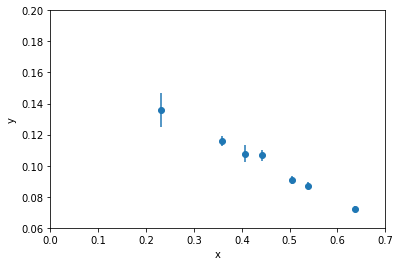

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# data from 
# legend: x, y, sigmax, sigmay
myData = np.array([[0.6359, 0.0028, 0.0724, 0.0016],
                   [0.5379, 0.0028, 0.0871, 0.0021],
                   [0.5055, 0.0032, 0.0907, 0.0026],
                   [0.4423, 0.0030, 0.1067, 0.0035],
                   [0.4066, 0.0051, 0.1078, 0.0052],
                   [0.3581, 0.0028, 0.1159, 0.0032],
                   [0.2319, 0.0058, 0.1358, 0.0110]])
x = myData[:,0]
y = myData[:,2]
sigmax = myData[:,1]
sigmay = myData[:,3]

plt.figure()
plt.errorbar(x, y, yerr=sigmay, fmt='o')
plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, 0.7)
plt.ylim(0.06, 0.2)

In [11]:
def chisq(params):
    a, b = params
    return np.sum( (a + b*x - y)**2/sigmay**2 )

initial_guess = [0.16, -5]
minimize(chisq, initial_guess)

      fun: 2.0030757432000352
 hess_inv: array([[ 1.62381261e-05, -2.92082778e-05],
       [-2.92082778e-05,  5.42251081e-05]])
      jac: array([5.96046448e-08, 8.94069672e-08])
  message: 'Optimization terminated successfully.'
     nfev: 32
      nit: 5
     njev: 8
   status: 0
  success: True
        x: array([ 0.17291389, -0.15861776])

In [12]:
from scipy.special import gammaincc

dof = len(myData) - 2
chisq_min = minimize(chisq, initial_guess).fun

print("chisq_min/dof = ", chisq_min/dof)
print("Q = ", gammaincc(dof/2, chisq_min/2))

chisq_min/dof =  0.400615148640007
Q =  0.8487192846484906


(0.06, 0.2)

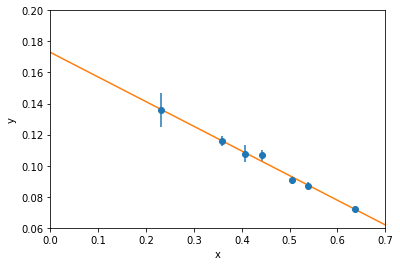

In [13]:
plt.figure()
plt.errorbar(x, y, yerr=sigmay, fmt='o')

best_fit = minimize(chisq, initial_guess).x
x_for_plot = np.linspace(0, 0.7, 100)
plt.plot(x_for_plot, best_fit[0] + best_fit[1]*x_for_plot)

plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, 0.7)
plt.ylim(0.06, 0.2)

We can also find the minimum **analytically** (by solving $\partial\chi^2/\partial a = \partial\chi^2/\partial b = 0$)

Define

$$
\begin{align}
S &\equiv& \sum_{i=1}^N\frac{1}{\sigma_i^2}\\
S_x &\equiv& \sum_{i=1}^N\frac{x_i}{\sigma_i^2}\\
S_y &\equiv& \sum_{i=1}^N\frac{y_i}{\sigma_i^2}\\
t_i &\equiv& \frac{1}{\sigma_i}\left(x_i-\frac{S_x}{S}\right)\\
S_{tt} &\equiv& \sum_{i=1}^N t_i^2
\end{align}
$$

Then

$$
\begin{align}
b &=& \frac{1}{S_{tt}}\sum_{i=1}^N\frac{t_iy_i}{\sigma_i}\\
a &=& \frac{S_y-S_xb}{S}
\end{align}
$$

(see "Numerical Recipes" for derivation)

In [14]:
S = np.sum(1/sigmay/sigmay)
Sx = np.sum(x/sigmay/sigmay)
Sy = np.sum(y/sigmay/sigmay)
t = (x-Sx/S)/sigmay
Stt = np.sum(t*t)

b = np.sum(t*y/sigmay)/Stt
a = (Sy-Sx*b)/S
print('[ %.8f' % a, '%.8f' % b, ']')
print(best_fit)

[ 0.17291400 -0.15861795 ]
[ 0.17291389 -0.15861776]


Errors on the fit coefficients:

$$
\begin{align}
\sigma_a^2 &=& \frac{1}{S}\left(1+\frac{S_x^2}{SS_{tt}}\right)\\
\sigma_b^2 &=& \frac{1}{S_{tt}}
\end{align}
$$

(see "Numerical Recipes" for derivation)

In [15]:
error_on_a = np.sqrt((1+Sx*Sx/S/Stt)/S)
error_on_b = np.sqrt(1/Stt)

print("a = ", a, "+-", error_on_a, "\nb =", b, "+-", error_on_b)

a =  0.17291400480869254 +- 0.005698795029183341 
b = -0.15861794692190379 +- 0.010413945532988245


(0.06, 0.2)

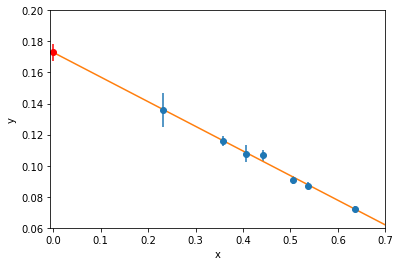

In [16]:
plt.errorbar(x, y, yerr=sigmay, fmt='o')
plt.errorbar(0, best_fit[0], yerr=error_on_a, fmt='ro')
plt.plot(x_for_plot, best_fit[0] + best_fit[1]*x_for_plot)

plt.xlabel("x")
plt.ylabel("y")
plt.xlim(-0.006, 0.7)
plt.ylim(0.06, 0.2)

**Data errors in both coordinates**

$$
\chi^2 = \sum_{i=1}^N {(y_i - a - bx_i)^2 \over \sigma_{y,i}^2 + b^2\sigma_{x,i}^2 }
$$

This is true because of the properties of the variance

$$ {\rm Var} (aX+bY+c)=a^{2}{\rm Var} (X)+b^{2}{\rm Var} (Y)+2ab\,{\rm Cov} (X,Y)$$

and hence

$${\rm Var}(y_i - a - bx_i) = {\rm Var}(y_i) + b^2{\rm Var}(x_i) = \sigma_{y,i}^2 + b^2\sigma_{x,i}^2$$

for independent errors

In [17]:
def chisq(params):
    a, b = params
    return np.sum( (a + b*x - y)**2/ (sigmay**2 + b*b*sigmax**2) )

initial_guess = [0.2, -1]
minimize(chisq, initial_guess)

      fun: 1.9512009993135009
 hess_inv: array([[ 1.68428055e-05, -3.03958590e-05],
       [-3.03958590e-05,  5.66377164e-05]])
      jac: array([-5.96046448e-08,  1.93715096e-07])
  message: 'Optimization terminated successfully.'
     nfev: 64
      nit: 12
     njev: 16
   status: 0
  success: True
        x: array([ 0.17298943, -0.15875628])

In [18]:
chisq_min_withxerrors = minimize(chisq, initial_guess).fun

print("chisq_min/dof = ", chisq_min_withxerrors/dof)
print("Q = ", gammaincc(dof/2, chisq_min_withxerrors/2))

chisq_min/dof =  0.3902401998627002
Q =  0.8558552840382943


(0.06, 0.2)

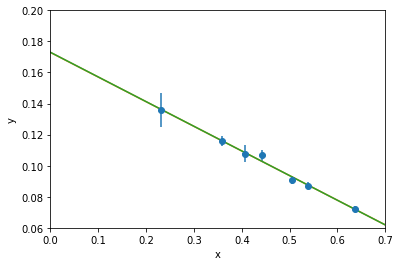

In [19]:
plt.figure()
plt.errorbar(x, y, xerr = sigmax, yerr = sigmay, fmt='o')

best_fit_withxerrors = minimize(chisq, initial_guess).x
plt.plot(x_for_plot, best_fit[0] + best_fit[1]*x_for_plot)
plt.plot(x_for_plot, best_fit_withxerrors[0] + best_fit_withxerrors[1]*x_for_plot)

plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, 0.7)
plt.ylim(0.06, 0.2)

- no longer an easy analytic solution for $a$ and $b$ (because $\partial\chi^2/\partial b=0$ is a nonlinear equation!)
- we can only exactly express $a$ as a function of $b$

$$a = \frac{\sum_{i=1}^N w_i(y_i-bx_i)}{\sum_{i=1}^N w_i}\ \ {\rm where }\ \ w_i=\frac{1}{\sigma_{y,i}^2 + b^2\sigma_{x,i}^2}$$

- need to minimize $\chi^2$ numerically, but can use formula above to simplify the function
- finding the standard errors on $a$ and $b$ is much more complicated:

<br>

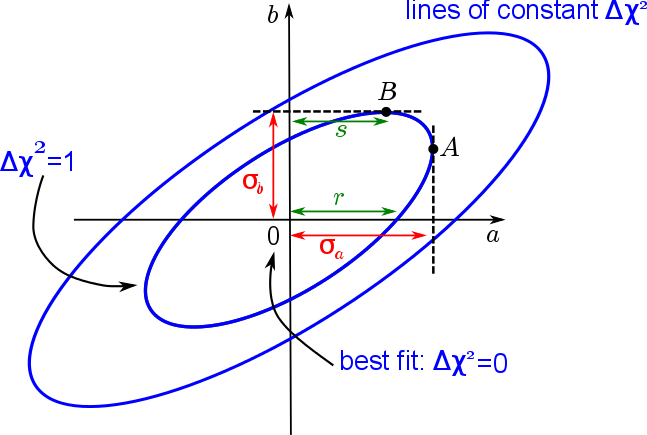

<div style="text-align: right"> figure adapted from "Numerical Recipes" </div>

> A contour of constant $\Delta\chi^2$ as the boundary of a confidence region 

For normally distributed errors: 

This table shows the values of $\Delta\chi^2$ as function of confidence level $p$ and number of fit parameters $\nu$ on which we need an error estimate

$$
\begin{array}{|l|llllll|}
\hline
       &      &      & \nu  &      &      &     \\
p      & 1    & 2    & 3    & 4    & 5    & 6    \\       \hline
68.3\%  & 1.00 & 2.30 & 3.53 & 4.72 & 5.89 & 7.04 \\
90\%    & 2.71 & 4.61 & 6.25 & 7.78 & 9.24 & 10.6 \\
95.4\%  & 4.00 & 6.17 & 8.02 & 9.70 & 11.3 & 12.8 \\
99\%    & 6.63 & 9.21 & 11.3 & 13.3 & 15.1 & 16.8 \\
99.73\% & 9.00 & 11.8 & 14.2 & 16.3 & 18.2 & 20.1 \\
99.99\% & 15.1 & 18.4 & 21.1 & 23.5 & 25.7 & 27.8 \\ \hline
\end{array}
$$

Example:

> $\Delta\chi^2 = 1$ corresponds to the "standard" 68.3% confidence interval on *the intercept* for a linear fit

Strategy:

- find the best fit first, by using a minimization routine
- then map out the $\Delta\chi^2 = 1$ contour numerically
- this corresponds to solving a nonlinear equation
- we can use the geometric fact $\sigma_a^2 = r^2+s^2$, see picture:
     - first find point $B$ in the picture
     - for this we need the maximal value of $b$ so that $\Delta\chi^2 = \chi^2 - \chi^2_{\rm min} = 1$ (remember that we have a formula that gives us $a$ as a function of $b$)
     - this gives us $\sigma_b$ and the distance $s$ in the picture
     - then keep $b$ fixed (at its "best value") and vary $a$ until we reach $\Delta\chi^2 = \chi^2 - \chi^2_{\rm min} = 1$
     - this gives us the distance $r$ in the picture
     - we also have an exact formula for $r$:
     $$r^2 = \frac{1}{\sum_{i=1}^N w_i}$$
     - and we can get $\sigma_a$ with the geometric formula!

[ 0.17298943 -0.15875628]
True


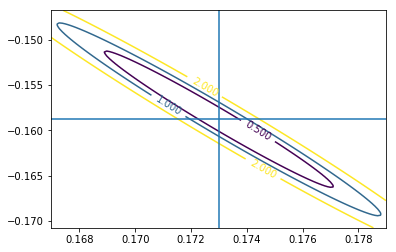

In [233]:
def chisq(params):
    a, b = params
    return np.sum( (a + b*x - y)**2/ (sigmay**2 + b*b*sigmax**2) )

def w(b):
    return 1/ (sigmay**2 + b*b*sigmax**2)

def a_exact(b):
    return np.sum(w(b)*(y-b*x))/np.sum(w(b))

def r_squared(b):
    return 1/np.sum(w(b))

# our best fit from before
print(best_fit_withxerrors)

# check exact formula for a
print(np.allclose(best_fit_withxerrors[0], a_exact(best_fit_withxerrors[1])))

# plot Δχ2 contours
delta_a = 0.006
delta_b = 0.012
a = np.arange(best_fit_withxerrors[0]-delta_a, best_fit_withxerrors[0]+delta_a, 0.0001)
b = np.arange(best_fit_withxerrors[1]-delta_b, best_fit_withxerrors[1]+delta_b, 0.0001)

delta_chisq = np.zeros((len(b), len(a)))
for i in range(len(a)):
    for j in range(len(b)):
        delta_chisq[j, i] = np.sum( (a[i] + b[j]*x - y)**2/(sigmay**2 + b[j]*b[j]*sigmax**2) ) - chisq_min_withxerrors

chi_contours = plt.contour(a, b, delta_chisq, levels = [0.5, 1, 2])
plt.clabel(chi_contours, inline=1, fontsize=10)
plt.axvline(x = best_fit_withxerrors[0])
plt.axhline(y = best_fit_withxerrors[1])
plt.show()

#### General linear least squares

In the same way as before, we can fit to a linear combination of *any* $M$ specified functions of $x$!

Most common: polynomials, in particular low order

$$y(x)=a_1+a_2x+a_3x^2\ldots+a_Mx^{M-1}$$

General formula:

$$y(x)=\sum_{k=1}^Ma_kX_{k-1}(x)$$

where the (arbitrary) functions $X_k(x)$ are called **basis functions**

- the functions $X_k(x)$ **do not have to be linear**
- only the **combination** (dependence on the fit parameters) is linear

Often nonlinear functions can be made linear:

$$f(x) = a x^d \ \ \ {\rm with}\ \ {\rm constant }\ \ \ a, d$$

Take the logarithm of both sides of the equation:

$$\log(f) = \log(a) + d \log(x)$$

=> linear fit on a log-log scale

Similar: log-scale for exponentials

#### Which order should I fit?

chisq_min/dof =  0.4841212262260674
Q =  0.2525601640844357


(0.06, 0.2)

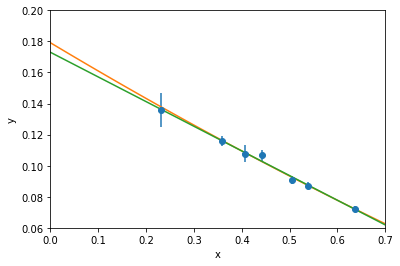

In [20]:
def chisq2(params):
    a, b, c = params
    return np.sum( (a + b*x + c*x*x - y)**2/sigmay**2 )

initial_guess = [0.2, -1, 0]
minimize(chisq2, initial_guess)

dof = len(myData) - 3
chisq_min2 = minimize(chisq2, initial_guess).fun

print("chisq_min/dof = ", chisq_min2/dof)
print("Q = ", gammainc(dof/2, chisq_min2/2))

plt.errorbar(x, y, xerr = sigmax, yerr = sigmay, fmt='o')

best_fit_quad = minimize(chisq2, initial_guess).x
plt.plot(x_for_plot, best_fit_quad[0] + best_fit_quad[1]*x_for_plot + best_fit_quad[2]*x_for_plot*x_for_plot)
plt.plot(x_for_plot, best_fit_withxerrors[0] + best_fit_withxerrors[1]*x_for_plot)

plt.xlabel("x")
plt.ylabel("y")
plt.xlim(0, 0.7)
plt.ylim(0.06, 0.2)

#### Meaningless fits

<img src="https://imgs.xkcd.com/comics/linear_regression.png" alt="Scientific Approach" style="width: 400px;"/>

Source [xkcd](https://xkcd.com/1725/)